In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization 1
import seaborn as sns # Visualization 2


import os
from google.colab import drive
drive.mount('/content/gdrive')


from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # Support Vector Machine
import xgboost as xgb # XGBoost stands for “Extreme Gradient Boosting. 
from sklearn.ensemble import RandomForestClassifier #Import Random Forest Model

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/heart_cleveland_upload.csv",sep=';')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


# Visualization

In [6]:
#df.isnull().values.any()
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [7]:
#for checking ouliers
# check if we have to scale or not
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [8]:
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

In [9]:
137/160 #not much imbalence 

0.85625

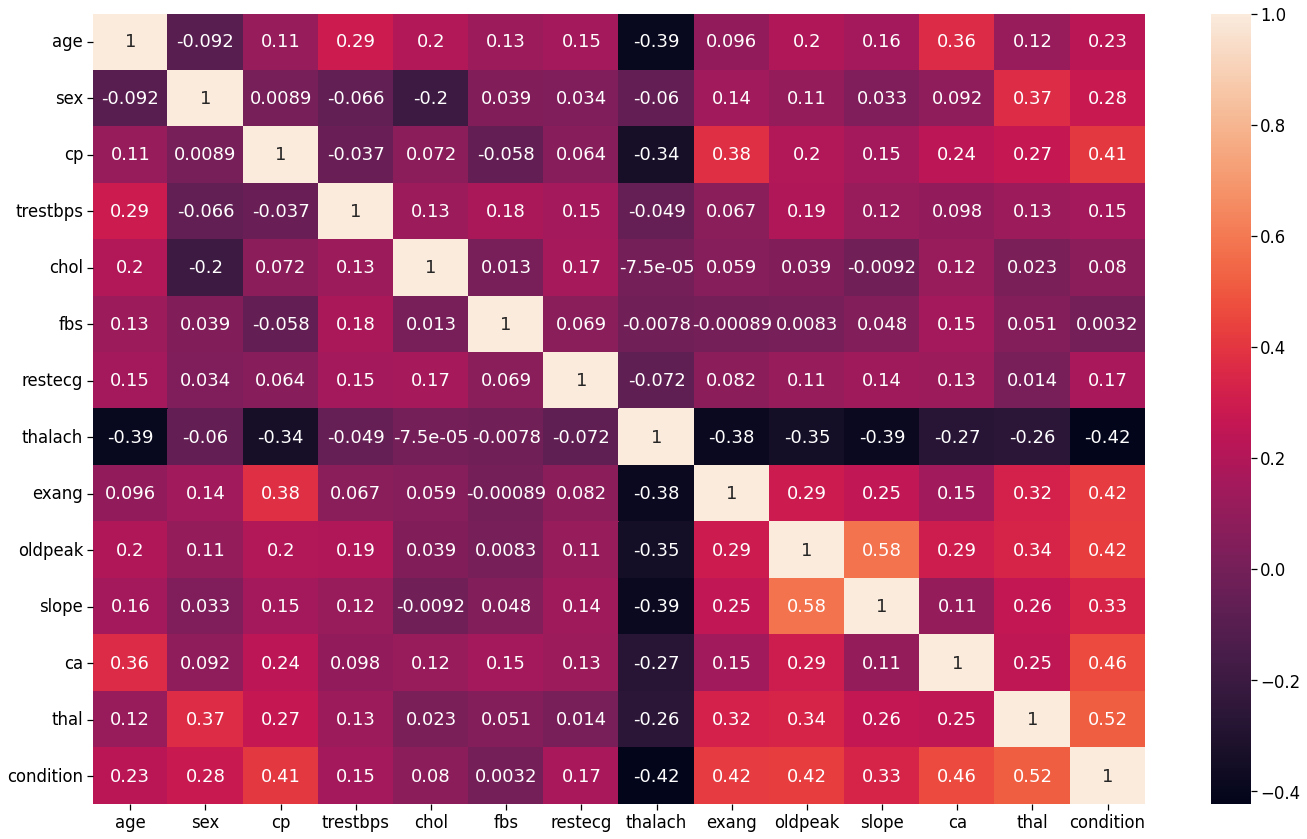

In [10]:
#which feature is negatively correlated and which is positively correlated
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

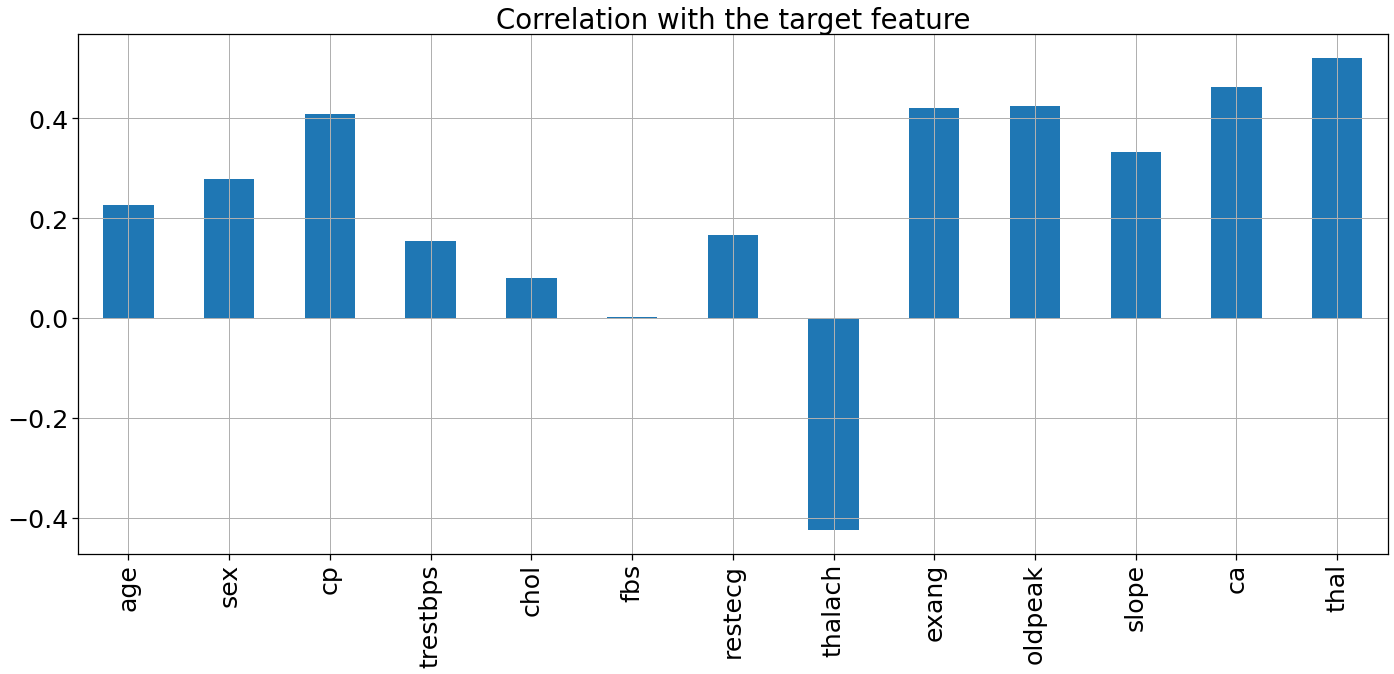

In [11]:
sns.set_context('notebook',font_scale = 2.3)
df.drop('condition', axis=1).corrwith(df.condition).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

AGE

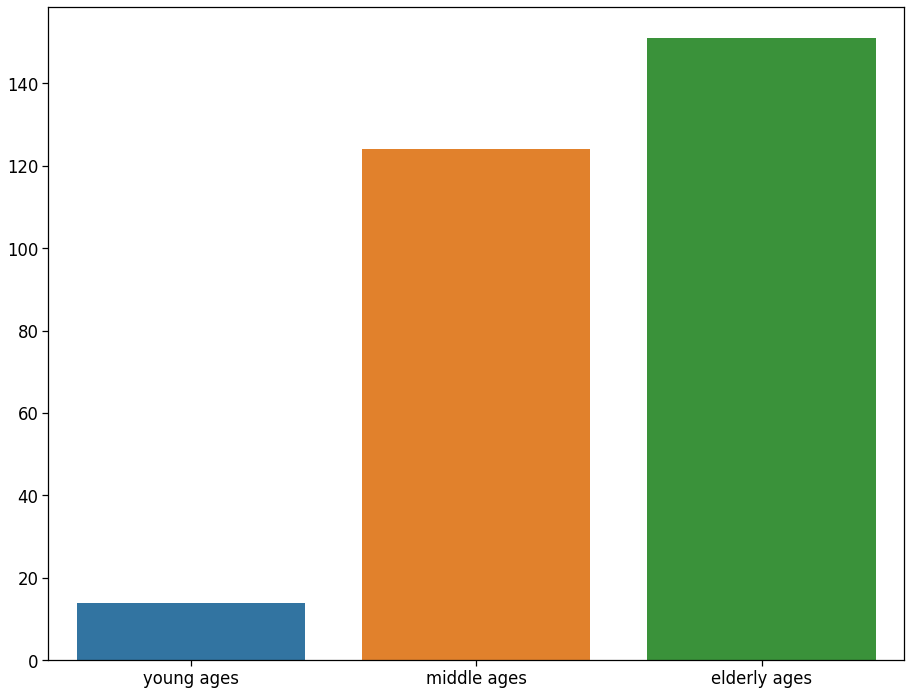

In [12]:
# Here we can see that elder people are the most affected by heart disease and young ones are the least affected.
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

plt.figure(figsize=(13,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

SEX

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


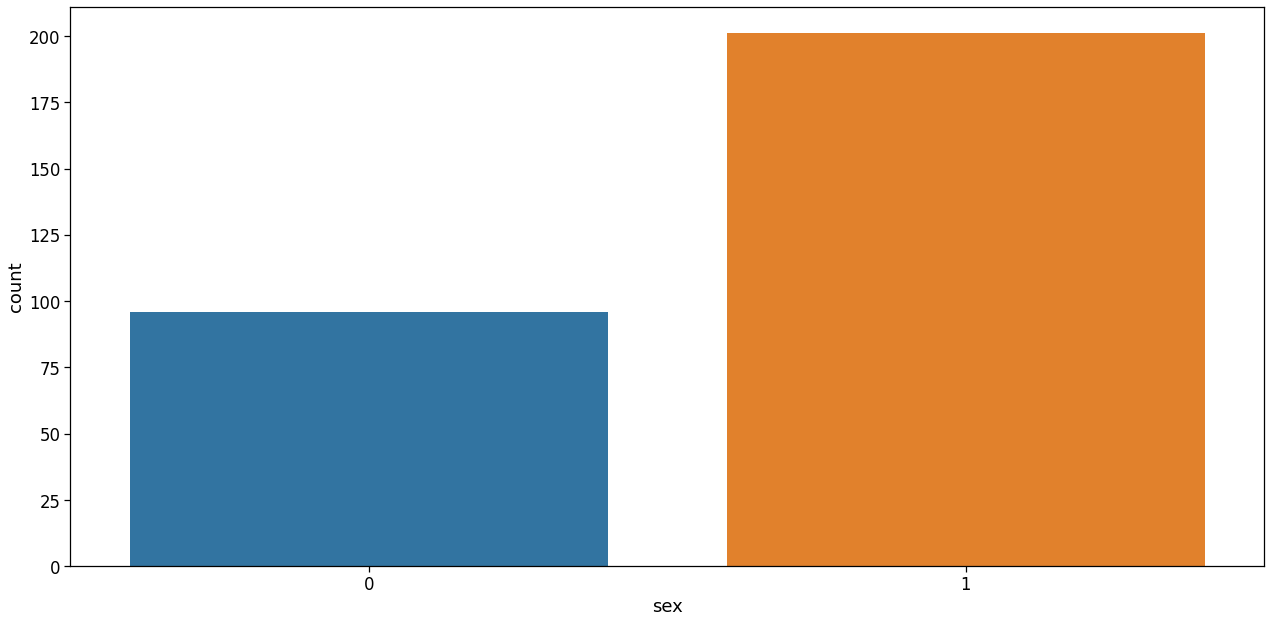

In [13]:
# Ratio of Male to Female is approx 2:1
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['sex'])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


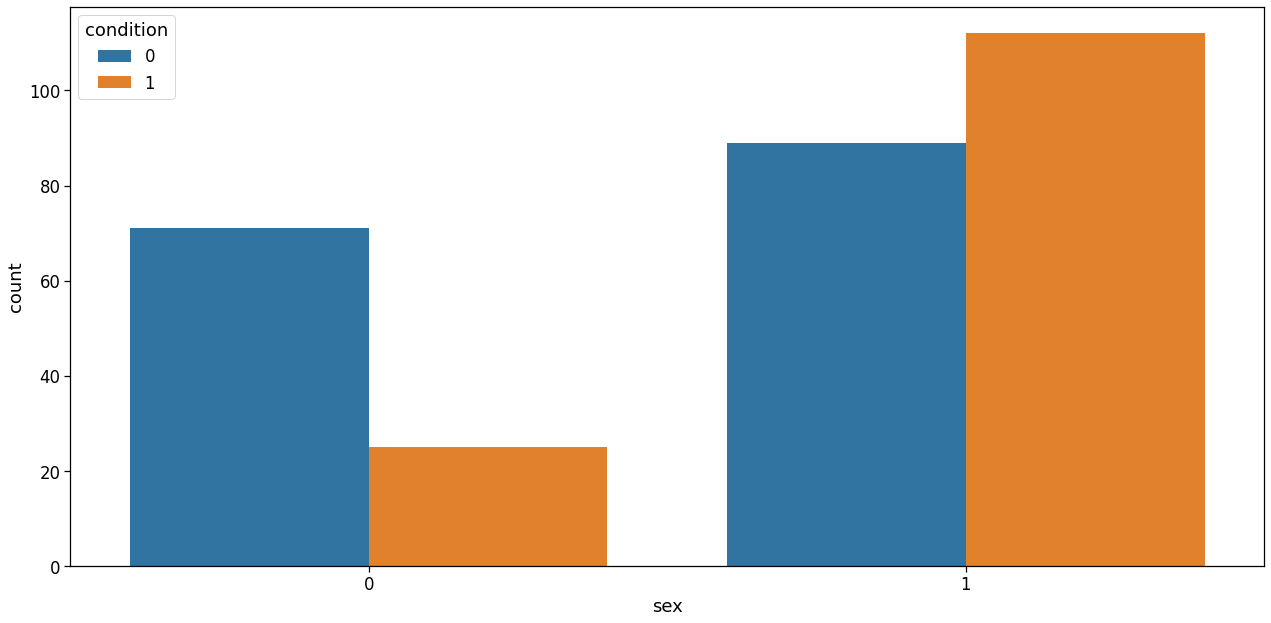

In [14]:
#the slope value is higher in the case of males
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['sex'],hue=df["condition"])
plt.tight_layout()

Chest Pain Type(“cp”)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


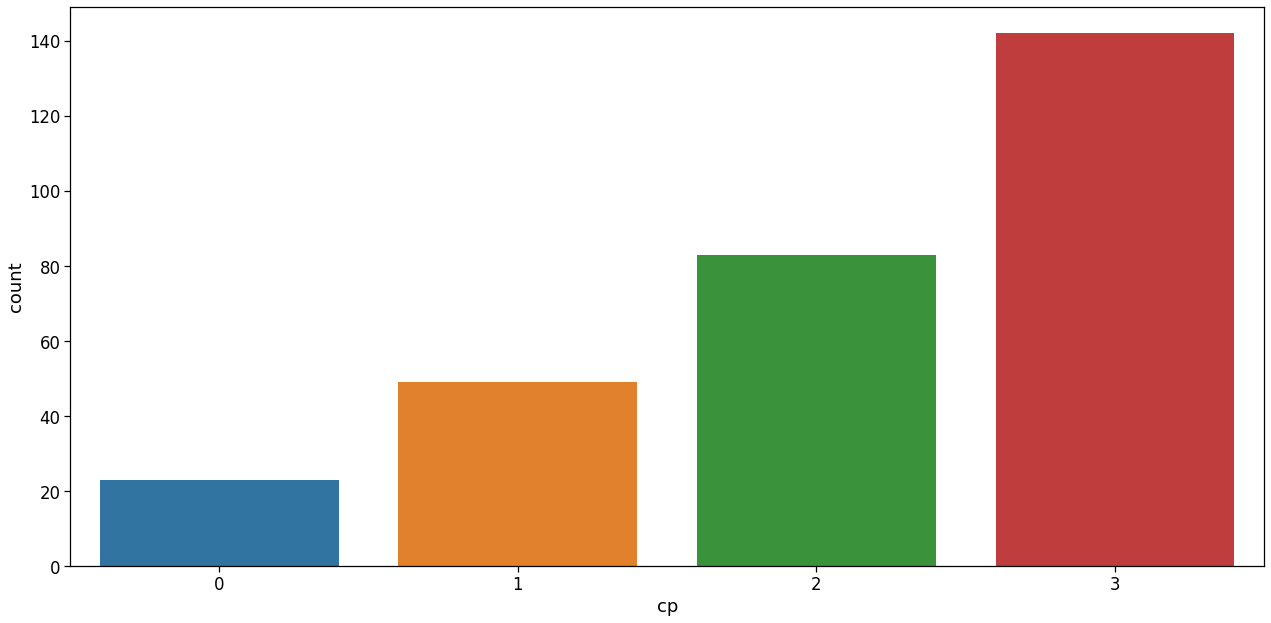

In [ ]:
# 4 types of chest pain
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['cp'])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


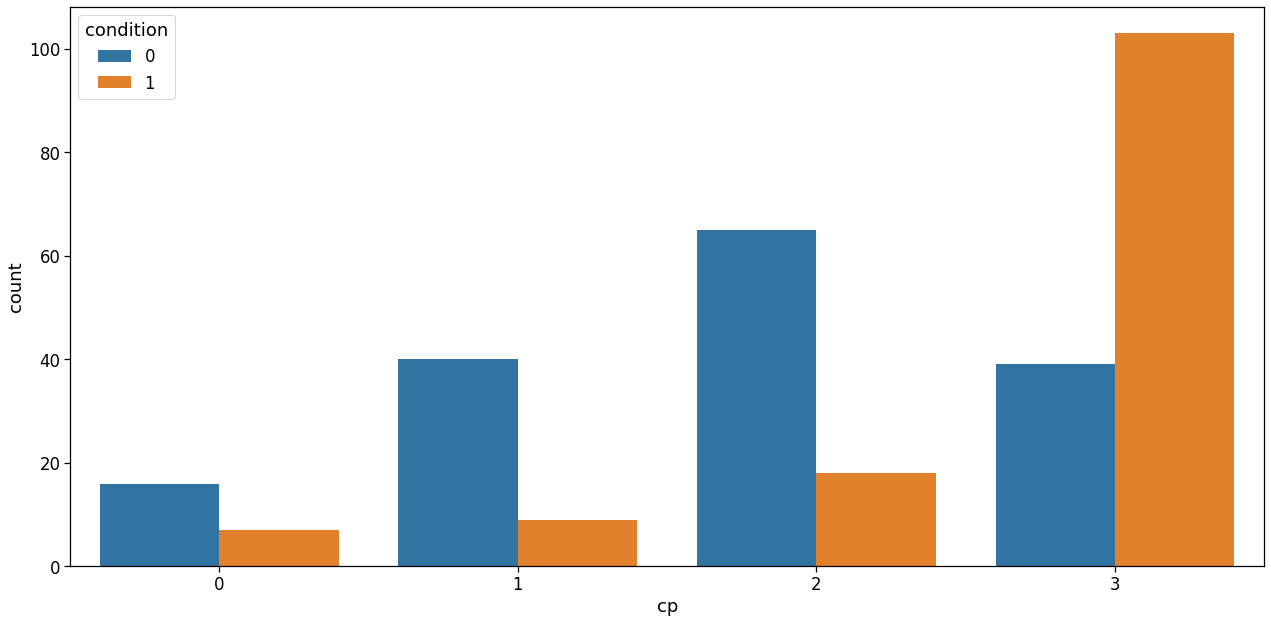

In [ ]:
#Analyzing cp vs target column
#People having severe chest pain are likely to have heart disease.
#Elderly people are more likely to have chest pain.
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['cp'],hue=df["condition"])
plt.tight_layout()

Thal

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


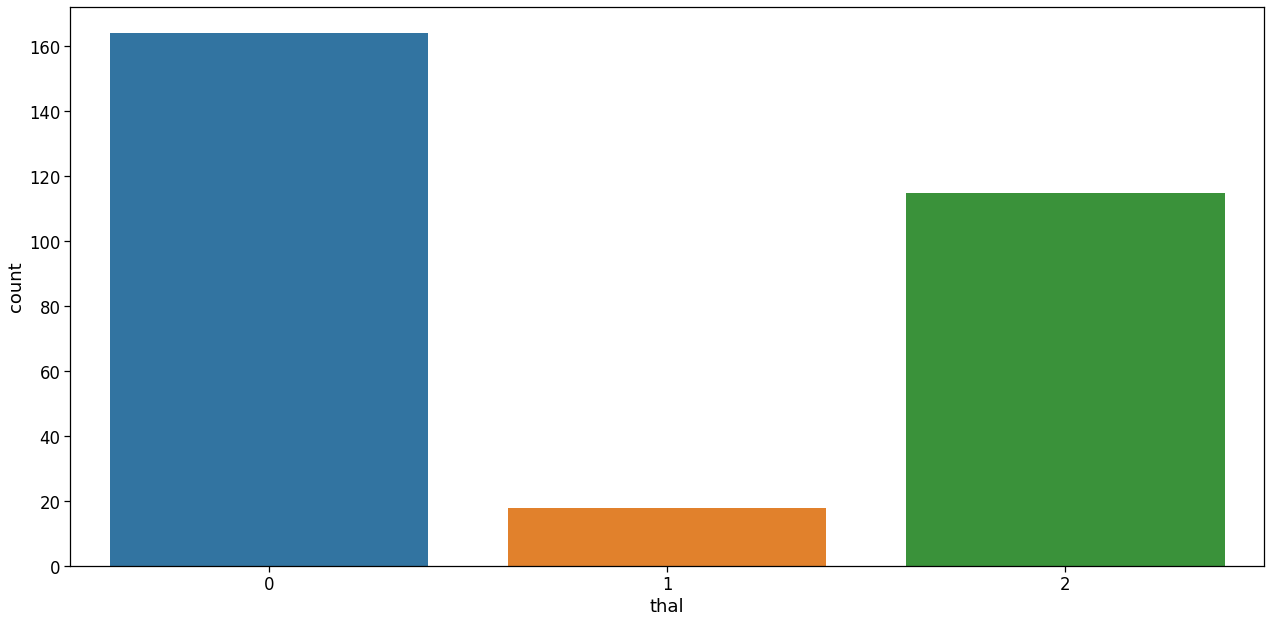

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['thal'])
plt.tight_layout()

Target

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


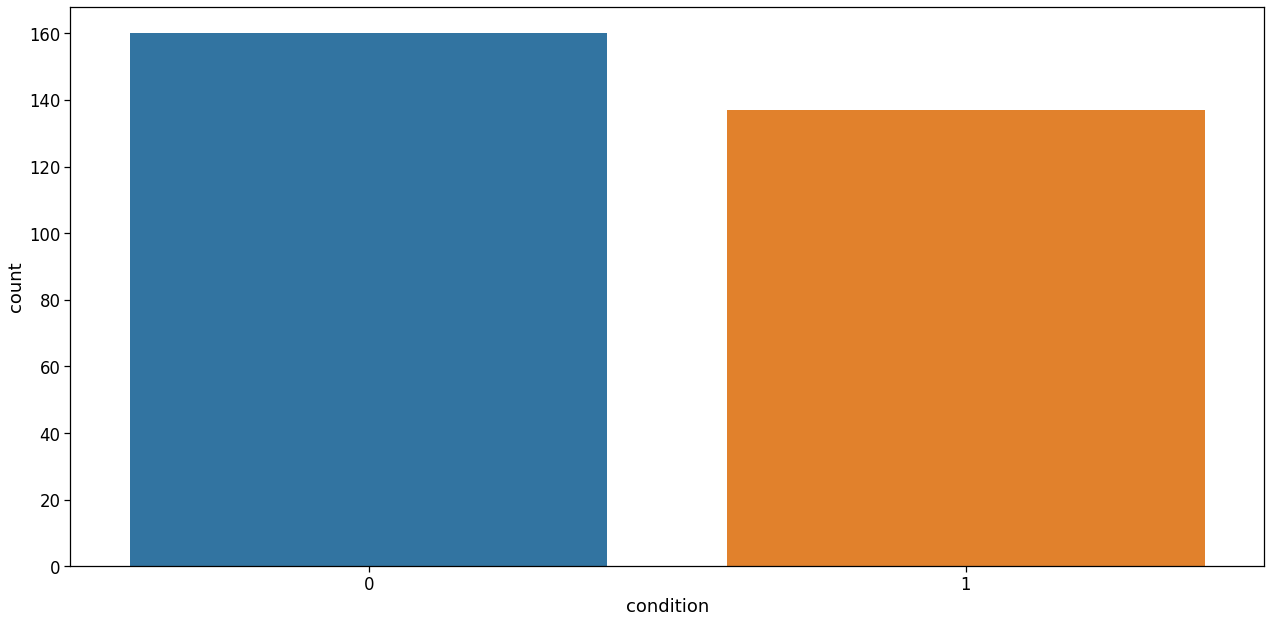

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['condition'])
plt.tight_layout()

# Models

In [ ]:
import copy
from sklearn import preprocessing

df_cat=copy.copy(df)

df_cat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pandas_profiling as pp



In [ ]:
target_name = 'condition'
Y = df_cat[target_name]
X = df_cat.drop([target_name], axis=1)

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=0)

GNB without FS

In [ ]:
from sklearn.naive_bayes import GaussianNB
scores=cross_val_score(GaussianNB(),X,Y,cv=10)
scores.mean()

0.8311494252873564

In [ ]:
pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


GNB with FS

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
  

ffs = SequentialFeatureSelector(gnb, k_features=12, forward=True,n_jobs=10)
ffs = ffs.fit(X,Y)
features = list(ffs.k_feature_names_)
print(features)

new_data = df_cat[features]
scores=cross_val_score(GaussianNB(),new_data,Y,cv=10)
scores.mean()

#new_data.head()
#train1, test1, target1, target_test1 = train_test_split(new_data, data_target, test_size=0.3, random_state=0)
#gnb.fit(train1, target1)
#acc_test = round(gnb.score(test1, target_test1) * 100, 2)
#print(acc_test)

['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


0.8517241379310345

SVM

In [ ]:
from sklearn import svm
scores=cross_val_score(svm.SVC(kernel = 'rbf', C = 400),X,Y,cv=10)
scores.mean()

0.8148275862068965

SVM with Bagging

In [ ]:
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
bSVM=BaggingClassifier(base_estimator=svm.SVC(kernel = 'rbf', C = 400),n_estimators=75, random_state=41)
scores=cross_val_score(bSVM,X,Y,cv=10)
scores.mean()


0.8316091954022988

SVM with FS

In [ ]:
from sklearn import svm
from mlxtend.feature_selection import SequentialFeatureSelector
svmfs=svm.SVC(kernel = 'rbf', C = 400)

ffs = SequentialFeatureSelector(svmfs, k_features=11, forward=True,n_jobs=10)
ffs = ffs.fit(X,Y)
features = list(ffs.k_feature_names_)
print(features)

new_data = df_cat[features]
scores=cross_val_score(svmfs,new_data,Y,cv=10)
scores.mean()

['sex', 'cp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


0.8385057471264368

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
scores=cross_val_score(rf,X,Y,cv=10)
scores.mean()

0.8078160919540229

Random Forest With Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
rf = RandomForestClassifier(n_estimators=75,random_state=42)

ffs = SequentialFeatureSelector(rf, k_features=7, forward=True,n_jobs=10)
ffs = ffs.fit(X,Y)
features = list(ffs.k_feature_names_)
print(features)

new_data = df_cat[features]
scores=cross_val_score(rf,new_data,Y,cv=10)
scores.mean()

['chol', 'fbs', 'restecg', 'oldpeak', 'slope', 'ca', 'thal']


0.8217241379310345

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
scores=cross_val_score(dt,X,Y,cv=10)
scores.mean()

0.7170114942528736

DT with bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bdt=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),n_estimators=4, random_state=41)
scores=cross_val_score(bdt,X,Y,cv=10)
scores.mean()


0.770919540229885

DT with bagging and FS

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
bdt=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),n_estimators=4, random_state=41)
ffs = SequentialFeatureSelector(bdt, k_features=13, forward=True,n_jobs=10)
ffs = ffs.fit(X,Y)
features = list(ffs.k_feature_names_)
print(features)

new_data = df_cat[features]
scores=cross_val_score(bdt,new_data,Y,cv=10)
scores.mean()

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


0.770919540229885